In [1]:
# https://habr.com/ru/post/347564/.
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

import keras
import sys

import time
#from google.colab import files # для импорта данных в google colab
#from google.colab import drive # для импорта данных в google colab из google drive
import zipfile # для работы с архивами 
from tqdm import tqdm_notebook as tqdm

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import csv
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from PIL import Image
import os
import tensorflow as tf

from keras.layers import Input
from keras.applications import xception
from keras.preprocessing import image

from tensorflow.keras.preprocessing import image as im
import time

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
from keras import backend as K
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import load_model  



Using TensorFlow backend.


In [2]:
class_names_lights   = ['1', '2', '3', '4', '5']
class_names_signal   = ['0', '1', '2', '3', '4', '5']
class_names_position = ['1', '2', '3', '4', '5']

In [3]:
nb_validation_samples = 12630
batch_size = 1
n_classes_lights = 5
n_classes_signal = 6
n_classes_position = 5
validation_data_dir_lights = "/home/z_andrei/datasets/DTLD/val/lights"
validation_data_dir_signal = "/home/z_andrei/datasets/DTLD/val/colours"
validation_data_dir_position = "/home/z_andrei/datasets/DTLD/val/position"

In [4]:
test_datagen = ImageDataGenerator(rescale = 1.0 / 255)

In [5]:
def multiple_outputs(generator, image_dir, batch_size, image_size):
    gen = validation_generator_lights = test_datagen.flow_from_directory(
    validation_data_dir_lights,
    target_size = (71, 71),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=False)
    
    while True:
        gnext = gen.next()
        print(gnext[0].shape, gnext[1].shape)
        # return image batch and 3 sets of lables
        yield gnext[0], gnext[1]
        
test_generator = multiple_outputs(
    test_datagen,
    image_dir=validation_data_dir_lights,
    batch_size=batch_size,
    image_size=(71, 71))

In [6]:
img_width, img_height = 71, 71

test_datagen = ImageDataGenerator(rescale = 1.0 / 255)

#validation_generator = test_datagen.flow_from_directory()
validation_generator_lights = test_datagen.flow_from_directory(
    validation_data_dir_lights,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=False)

validation_generator_signal = test_datagen.flow_from_directory(
    validation_data_dir_signal,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=False)

validation_generator_position = test_datagen.flow_from_directory(
    validation_data_dir_position,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=False)

validation_generators = [validation_generator_lights,\
                         validation_generator_signal,\
                         validation_generator_position]

Found 50107 images belonging to 5 classes.
Found 50107 images belonging to 6 classes.
Found 50107 images belonging to 5 classes.


In [7]:
model_backbone1 = load_model('weights-improvement-triple-71-10-aorient-0.94-acolor0.87-anum0.91.hdf5')
#model_lights = load_model('weights-lights-improvement-71-11-0.98.hdf5')
#model_signal = load_model('weights-improvement-71-06-0.95.hdf5')
#model_position = load_model('weights-position-improvement-71-11-0.98.hdf5')

In [8]:
model_backbone1.compile(loss='mse', metrics=[tf.keras.metrics.Recall()])

In [9]:
img_width, img_height = 71, 71

test_datagen = ImageDataGenerator(rescale = 1.0 / 255)
validation_data_dir = "/home/z_andrei/datasets/DTLD/val"
#validation_generator = test_datagen.flow_from_directory()
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir_lights,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=False)

Found 50107 images belonging to 5 classes.


In [12]:
with open("/home/z_andrei/datasets/backbone_datasets/all_images", 'rb') as f:
    x = pickle.load(f)
with open("/home/z_andrei/datasets/backbone_datasets/annotations", 'rb') as f:
    y = pickle.load(f)
with open("/home/z_andrei/datasets/backbone_datasets/all_images_test", 'rb') as f:
    x_test = pickle.load(f)
with open("/home/z_andrei/datasets/backbone_datasets/annotations_test", 'rb') as f:
    y_test = pickle.load(f)

In [13]:
x = np.array(x)
x_test = np.array(x_test)
y=np.array([np.array(u) for u in y])
y1, y2, y3 = y[:, 0], y[:, 1], y[:, 2]
y1=np.array([np.array(u) for u in y1])
y2=np.array([np.array(u) for u in y2])
y3=np.array([np.array(u) for u in y3])
y_test=np.array([np.array(u) for u in y_test])
y1_test, y2_test, y3_test = y_test[:, 0], y_test[:, 1], y_test[:, 2]
y1_test=np.array([np.array(u) for u in y1_test])
y2_test=np.array([np.array(u) for u in y2_test])
y3_test=np.array([np.array(u) for u in y3_test])
y1_test[:10]

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [14]:
evaluation = model_backbone1.evaluate(x_test, [y1_test, y2_test, y3_test])
print(len(evaluation))

6713/6713 [==============================] - 14s 2ms/sample - loss: 0.0968 - pred_orientation_loss: 0.0224 - pred_colors_loss: 0.0398 - pred_numbers_loss: 0.0346 - pred_orientation_recall: 0.8895 - pred_colors_recall: 0.7855 - pred_numbers_recall: 0.8104
7


In [15]:
fps_71 = list()
tic = time.perf_counter()
predictions = model_backbone1.predict(x_test, verbose=1, batch_size=1)
toc = time.perf_counter()
fps_71.append(len(predictions[0])/(toc - tic))

6713/6713 [==============================] - 63s 9ms/sample


In [16]:
fps_71

[105.78970735315254]

In [17]:
for i in range(len(predictions)):
    predictions[i] = np.array(predictions[i])
    predictions[i] = np.argmax(predictions[i], axis=1)

In [24]:
labels = list()
labels.append(np.argmax(y1_test, axis=1))
labels.append(np.argmax(y2_test, axis=1))
labels.append(np.argmax(y3_test, axis=1))

In [19]:
labels = list()
labels.append(np.argmax(y1, axis=1))
labels.append(np.argmax(y2, axis=1))
labels.append(np.argmax(y3, axis=1))

In [25]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [59]:
y1_argmax = np.argmax(y1_test, axis=1)
y2_argmax = np.argmax(y2_test, axis=1)
y3_argmax = np.argmax(y3_test, axis=1)
unique1, counts1 = np.unique(y1_argmax, return_counts=True)
unique2, counts2 = np.unique(y2_argmax, return_counts=True)
unique3, counts3 = np.unique(labels[2], return_counts=True)
print(counts1, counts2, counts3)

[5288   75   98   50 1202] [ 360 1662  371   78 3040 1202] [ 132  281 4984  114 1202]


In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

6713 6713
counts [5288   75   98   50 1202]
accuracy 0.9407120512438552 
precisions [0.96406959 0.6        0.         0.34       0.9608985 ] 
recall [0.98990291 0.25568182 0.         0.0982659  0.95140033] 
f1 [0.97681548 0.35856574 0.         0.15246637 0.95612583]




/home/z_andrei/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


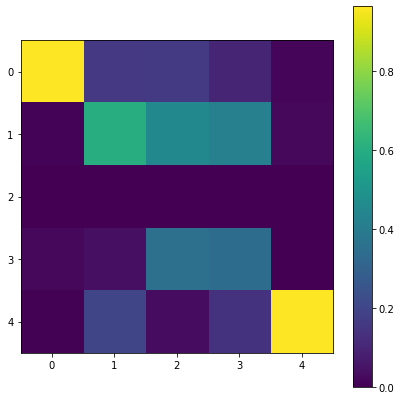

6713 6713
counts [ 360 1662  371   78 3040 1202]
accuracy 0.900640548190079 
precisions [0.75833333 0.88267148 0.76549865 0.         0.95       0.94342762] 
recall [0.46428571 0.91515908 0.73195876 0.         0.97633536 0.96428571] 
f1 [0.57594937 0.89862175 0.7483531  0.         0.96298766 0.95374264]




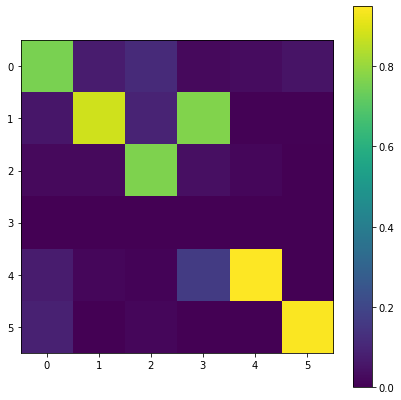

6713 6713
counts [ 132  281 4984  114 1202]
accuracy 0.921793534932221 
precisions [0.         0.55160142 0.97772873 0.1754386  0.9484193 ] 
recall [0.         0.5984556  0.94566272 0.18181818 0.95717884] 
f1 [0.         0.57407407 0.96142843 0.17857143 0.95277894]




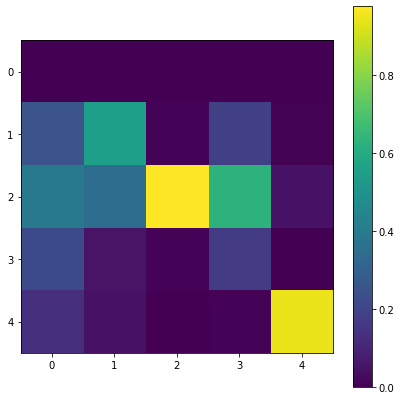

In [60]:
metrics_list = list()
for i in range(len(labels)):
    print(len(predictions[i]), len(labels[i]))
    precisions, recall, f1, _ = precision_recall_fscore_support(predictions[i], labels[i], labels=np.unique(labels[i]))
    accuracy = accuracy_score(predictions[i], labels[i])
    unique, counts = np.unique(labels[i], return_counts=True)
    print('counts {}'.format(counts))
    print('accuracy {} \nprecisions {} \nrecall {} \nf1 {}\n\n'.format(accuracy, precisions, recall, f1))
    
    confusion = confusion_matrix(predictions[i], labels[i], labels=np.unique(labels[i]), normalize='pred')
    plt.figure(figsize=(7, 7))
    plt.imshow(confusion)
    plt.colorbar()
    plt.show()